In [56]:
#Activity 7
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import requests
import sqlite3

#Importing HTML data
A = requests.get('https://en.wikipedia.org/wiki/List_of_countries_by_GDP_(nominal)')
soup = BeautifulSoup(A.content)

#Finding all the tables in the page
all_tables = soup.find_all('table')


#Filtering the table class we want
wikitable = soup.find('table', {'class' : 'wikitable'})

#Separating the data sources from the data, part 1: Sources

#Finding all the rows of our tables then filtering the first row containing the source names
sources = wikitable.tbody.find_all('tr', recursive = False)[0]

#Pulling each cell from the first row
sources_list = [td for td in sources.find_all('td')]
print('Number of wikitables in the page:', len(sources_list))
print(' ')

#Separating the data sources from the data, part 2: Data

#Finding all the rows of our tables then finding the second row and pulling the cells from the row
data = wikitable.tbody.find_all('tr', recursive = False)[1].find_all('td', recursive = False)

#Finding the data from td and appending the data to a list
data_tables = []
for td in data:
    data_tables.append(td.find_all('table'))

#Pulling the headers from the list
headers1 = [th.get_text().strip() for th in data_tables[0][0].find_all('th')]

#Going down levels (body, rows, cells) to get to the actual data
rows1 = data_tables[0][0].find_all('tbody')[0].find_all('tr')[1:]
row_data1 = [[td.get_text().strip() for td in tr.find_all('td')] for tr in rows1]

#Converting the data to a Pandas data frame
df1 = pd.DataFrame(row_data1, columns = headers1)[1:]
print('Per the International Monetary Fund: \n', df1.head())
print(' ')

#Second data frame

#Since all headers are the same, the same headers will be used for the other two data frames

#Going down levels (body, rows, cells) to get to the actual data
rows2 = data_tables[1][0].find_all('tbody')[0].find_all('tr')[1:]
row_data2 = [[td.get_text().strip() for td in tr.find_all('td')] for tr in rows2]

#Converting the data to a Pandas data frame
df2 = pd.DataFrame(row_data2, columns = headers1)[1:]
print('Per the World Bank: \n', df2.head())
print(' ')

#Third data frame

#Going down levels (body, rows, cells) to get to the actual data
rows3 = data_tables[2][0].find_all('tbody')[0].find_all('tr')[1:]
row_data3 = [[td.get_text().strip() for td in tr.find_all('td')] for tr in rows3]

#Converting the data to a Pandas data frame
df3 = pd.DataFrame(row_data3, columns = headers1)[1:]
print('Per the United Nations: \n', df3.head())


Number of wikitables in the page: 3
 
Per the International Monetary Fund: 
   Rank Country/Territory GDP(US$million)
1    1     United States      20,807,269
2    2   China[n 2][n 3]      14,860,775
3    3             Japan       4,910,580
4    4           Germany       3,780,553
5    5    United Kingdom       2,638,296
 
Per the World Bank: 
   Rank Country/Territory GDP(US$million)
1    1     United States      21,427,700
2    2        China[n 9]      14,342,903
3    3             Japan       5,081,770
4    4           Germany       3,845,630
5    5             India       2,875,142
 
Per the United Nations: 
   Rank Country/Territory GDP(US$million)
1    1     United States      21,433,226
2    2        China[n 9]      14,342,933
3    3             Japan       5,082,465
4    4           Germany       3,861,123
5    5             India       2,891,582


First name duplicated: True
Last name duplicated: True
Email duplicated: False
IP address duplicated:False
Visit number duplicated: True
 
Email contains NaN: False
IP address contains NaN:False
Visit number contains NaN: True
 
Data frame size: (1000, 7)
Data frame size after truncation: (974, 7)
Data frame row difference: 26
Data frame column difference: 0


Text(0, 0.5, 'Number of visits')

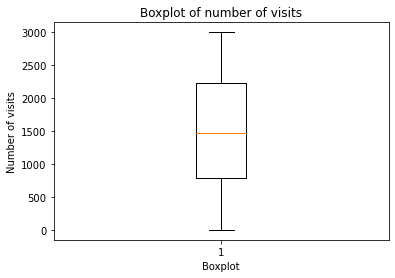

In [54]:
#Activity 8

#Reading the file
visit_data = pd.read_csv('visit_data.csv')

#Checking for any duplicates 
visit_data.head()
print('First name duplicated: {}'.format(any(visit_data['first_name'].duplicated())))
print('Last name duplicated: {}'.format(any(visit_data['last_name'].duplicated())))
print('Email duplicated: {}'.format(any(visit_data['email'].duplicated())))
print('IP address duplicated:{}'.format(any(visit_data['ip_address'].duplicated())))
print('Visit number duplicated: {}'.format(any(visit_data['visit'].duplicated())))

#Checking if any essential column contains NaN
print(' ')
print('Email contains NaN: {}'.format(any(visit_data['email'].isnull())))
print('IP address contains NaN:{}'.format(any(visit_data['ip_address'].isnull())))
print('Visit number contains NaN: {}'.format(any(visit_data['visit'].isnull())))
print(' ')

#Finding the number of rows for comparison to after the truncation
old_size = visit_data.shape
print('Data frame size: {}'.format(old_size))

#NaN values in the name, email, and IP columns can be normal (maybe the person's name, email, and IP were never recorded during the visit). 
#The visits column cannot have NaN values. Someone who had their visit data logged would mean they visited at least once.
#Therefore, NaN values in the visits column must be outliers and will be removed.

outliers_removed = visit_data[visit_data['visit'].notnull()]
new_size = outliers_removed.shape

print('Data frame size after truncation: {}'.format(new_size))

#Reporting the size difference between the data frames before and after truncation
print('Data frame row difference: {}'.format(old_size[0] - new_size[0]))
print('Data frame column difference: {}'.format(old_size[1] - new_size[1]))

#Now that the NaN outliers have been removed, numerical outliers can be removed.
#Making a boxplot to check for numerical outliers

plt.boxplot(outliers_removed['visit'])
plt.title('Boxplot of number of visits')
plt.xlabel('Boxplot')
plt.ylabel('Number of visits')

#The boxplot does not indicate any more outliers, so there is no more need to remove anything more.

In [4]:
#SQLite Activity

#Creating a table with columns for Name, Address, City, State, ZIP, and Phone Number.
#All column titles are strings except for ZIP codes which are integers.
query = """
CREATE TABLE SQLTestTable1 (Name VARCHAR(20), Address VARCHAR(20), City VARCHAR(20), State VARCHAR(20), Zip INTEGER, Phone_Number VARCHAR(20));
"""

#Connecting to the SQLite database and running the command to create the table with the above column names and data types
connection = sqlite3.connect('mydata.sqlite')
connection.execute(query)

connection.commit()

#Below is the data that will be added to the new table.
data = [('Yvette Fortin', '123 Unreal St', 'Seattle', 'Washington', 98101, '555-123-4567'),
        ('Faye Fortin', '123 Unreal St', 'Seattle', 'Washington', 98101, '555-123-4567'),
        ('Ai Yamada', '234 Fictional Blvd', 'San Francisco', 'California', 94117, '555-149-2000'),
        ('Kai Tiden', '567 Not Real Ave', 'San Jose', 'California', 95118, '555-745-9302'),
        ('Daisuke Ono', '5905 Imaginary Rd', 'Santa Clara', 'California', 95051, '555-222-1324'),
        ('Eric Ericsson', '21 Invented Ln', 'Medford', 'Oregon', 97504, '555-435-5861'),
        ('Ayane Sakura', '11 Contrived Pkwy', 'Olympia', 'Washington', 98502, '555-101-2244'),
        ('Fiorello Bodoni', '3083 Made Up Pde', 'Phoenix', 'Arizona', 85002, '555-123-4567'),
        ('Erwin Schrodinger', '123 Devised St', 'Tucson', 'Arizona', 85701, '555-111-9275'),
        ('Marie Curie', '123 Concocted Ln', 'Sacramento', 'California', 94204, '555-333-0749')]

#Insertion statement specifying to insert the data into the table
statement = "INSERT INTO SQLTestTable1 VALUES(?, ?, ?, ?, ?, ?)"

#Inserting the data into the table using the statement
connection.executemany(statement, data)
connection.commit()


#Query to pull the results of creating the table
#Connecting to the database, then executing the command to select all table data
connection = sqlite3.connect('mydata.sqlite')
executed = connection.execute('SELECT * FROM SQLTestTable1')

#Fetching the selected data from the table
rows = executed.fetchall()

#Getting the column names
desc = executed.description

#Displaying the fetched data in a Pandas data frame with the columns names added
pd.DataFrame(rows, columns=[x[0] for x in desc])



,Name,Address,City,State,Zip,Phone_Number
0,Yvette Fortin,123 Unreal St,Seattle,Washington,98101,555-123-4567
1,Faye Fortin,123 Unreal St,Seattle,Washington,98101,555-123-4567
2,Ai Yamada,234 Fictional Blvd,San Francisco,California,94117,555-149-2000
3,Kai Tiden,567 Not Real Ave,San Jose,California,95118,555-745-9302
4,Daisuke Ono,5905 Imaginary Rd,Santa Clara,California,95051,555-222-1324
5,Eric Ericsson,21 Invented Ln,Medford,Oregon,97504,555-435-5861
6,Ayane Sakura,11 Contrived Pkwy,Olympia,Washington,98502,555-101-2244
7,Fiorello Bodoni,3083 Made Up Pde,Phoenix,Arizona,85002,555-123-4567
8,Erwin Schrodinger,123 Devised St,Tucson,Arizona,85701,555-111-9275
9,Marie Curie,123 Concocted Ln,Sacramento,California,94204,555-333-0749
